# 🧾 Personal Expense Tracker

This notebook implements a simple personal expense tracker in Python. You can record expenses, view weekly/monthly summaries, and visualize spending.

In [15]:

import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt

DATA_FILE = Path('expenses.csv')

def ensure_csv():
    if not DATA_FILE.exists():
        df = pd.DataFrame(columns=['date','category','amount','description'])
        df.to_csv(DATA_FILE, index=False)

ensure_csv()


### Helper functions for date and amount parsing

In [16]:

def parse_date(s):
    s = str(s).strip()
    if s.lower() in ['', 'today', 't']:
        return pd.to_datetime('today').normalize()
    try:
        return pd.to_datetime(s).normalize()
    except Exception:
        raise ValueError("Date not recognized. Use YYYY-MM-DD or 'today'.")

def parse_amount(s):
    s = str(s).strip().replace(',', '')
    try:
        return float(s)
    except Exception:
        raise ValueError("Amount must be a number (e.g. 499 or 49.99).")


### Add expenses interactively

In [17]:

def add_expense_interactive():
    ensure_csv()
    date_input = input("Date (YYYY-MM-DD) [today]: ") or 'today'
    try:
        dt = parse_date(date_input)
    except ValueError as e:
        print("Error:", e)
        return

    category = input("Category (food, rent, travel, etc.): ").strip() or 'misc'
    amount_input = input("Amount (numbers only): ")
    try:
        amount = parse_amount(amount_input)
    except ValueError as e:
        print("Error:", e)
        return

    description = input("Description (optional): ").strip()
    new_row = {
        'date': dt.date().isoformat(),
        'category': category,
        'amount': amount,
        'description': description
    }

    pd.DataFrame([new_row]).to_csv(DATA_FILE, mode='a', header=not DATA_FILE.exists(), index=False)
    print("Saved:", new_row)


### Load expenses and view recent entries

In [18]:

def load_expenses():
    ensure_csv()
    df = pd.read_csv(DATA_FILE, parse_dates=['date'])
    return df

def show_recent(n=10):
    df = load_expenses()
    if df.empty:
        print("No expenses recorded yet.")
        return
    display(df.sort_values('date', ascending=False).head(n))

# Example usage
show_recent()


,date,category,amount,description
3,2025-10-02,food,200.0,dinner
7,2025-10-02,food,200.0,dinner
2,2025-09-30,rent,8000.0,monthly rent
6,2025-09-30,rent,8000.0,monthly rent
1,2025-09-29,travel,40.0,bus fare
5,2025-09-29,travel,40.0,bus fare
0,2025-09-28,food,150.0,lunch
4,2025-09-28,food,150.0,lunch


### Weekly summary with visualization

Summary for 2025-09-28 → 2025-10-04 — total: ₹16780.00


,amount
category,
rent,16000.0
food,700.0
travel,80.0


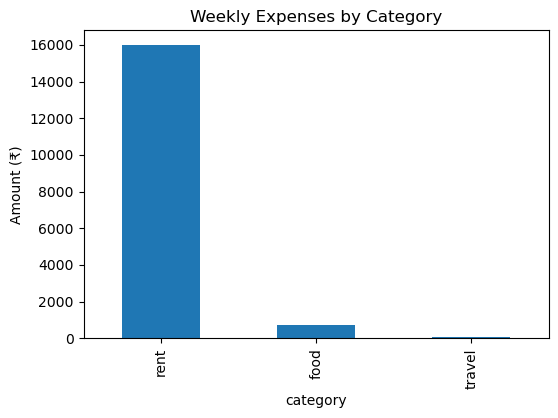

In [19]:

def weekly_summary(days=7):
    df = load_expenses()
    if df.empty:
        print("No expenses recorded.")
        return
    today = pd.to_datetime('today').normalize()
    start = today - pd.Timedelta(days=days-1)
    mask = (df['date'] >= start) & (df['date'] <= today)
    period_df = df.loc[mask]
    if period_df.empty:
        print(f"No expenses between {start.date()} and {today.date()}")
        return
    total = period_df['amount'].sum()
    by_cat = period_df.groupby('category')['amount'].sum().sort_values(ascending=False)
    print(f"Summary for {start.date()} → {today.date()} — total: ₹{total:.2f}")
    display(by_cat.to_frame('amount'))
    
    # Visualization
    by_cat.plot(kind='bar', figsize=(6,4), title='Weekly Expenses by Category')
    plt.ylabel('Amount (₹)')
    plt.show()

# Example
weekly_summary(7)


### Monthly summary with visualization

Summary for 2025-10 — total: ₹400.00


,amount
category,
food,400.0


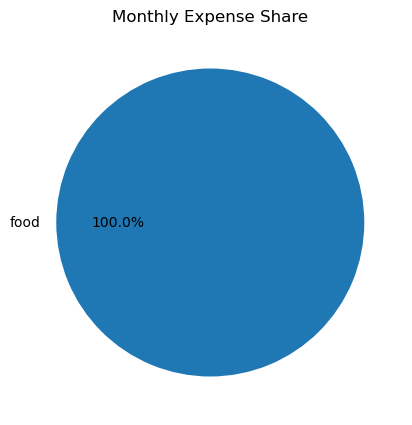

In [20]:

def monthly_summary(year=None, month=None):
    df = load_expenses()
    if df.empty:
        print("No expenses recorded.")
        return
    today = pd.to_datetime('today').normalize()
    if year is None:
        year = today.year
    if month is None:
        month = today.month
    mask = (df['date'].dt.year == int(year)) & (df['date'].dt.month == int(month))
    period_df = df.loc[mask]
    if period_df.empty:
        print(f"No expenses recorded for {year}-{month:02d}.")
        return
    total = period_df['amount'].sum()
    by_cat = period_df.groupby('category')['amount'].sum().sort_values(ascending=False)
    print(f"Summary for {year}-{month:02d} — total: ₹{total:.2f}")
    display(by_cat.to_frame('amount'))
    
    # Visualization (pie chart)
    by_cat.plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), title='Monthly Expense Share')
    plt.ylabel('')
    plt.show()

# Example
monthly_summary()


### (Optional) Add some sample data for testing

In [21]:

sample = [
    {'date':'2025-09-28','category':'food','amount':150.0,'description':'lunch'},
    {'date':'2025-09-29','category':'travel','amount':40.0,'description':'bus fare'},
    {'date':'2025-09-30','category':'rent','amount':8000.0,'description':'monthly rent'},
    {'date':'2025-10-02','category':'food','amount':200.0,'description':'dinner'},
]
pd.DataFrame(sample).to_csv(DATA_FILE, mode='a', header=not DATA_FILE.exists(), index=False)
print("Sample rows added.")


Sample rows added.
